In [1]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
data=pd.read_csv('police_department_data.csv')
data.head(10)

incident_id        category  \
0    120058272     WEAPON LAWS   
1    120058272     WEAPON LAWS   
2    141059263        WARRANTS   
3    160013662    NON-CRIMINAL   
4    160002740    NON-CRIMINAL   
5    160002869         ASSAULT   
6    160003130  OTHER OFFENSES   
7    160003259    NON-CRIMINAL   
8    160003970        WARRANTS   
9    160003641  MISSING PERSON   

                                crime_description           crime_date  \
0                       POSS OF PROHIBITED WEAPON  2016-01-29 11:00:00   
1  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE  2016-01-29 11:00:00   
2                                  WARRANT ARREST  2016-04-25 14:59:00   
3                                   LOST PROPERTY  2016-01-05 23:50:00   
4                                   LOST PROPERTY  2016-01-01 00:30:00   
5                                         BATTERY  2016-01-01 21:35:00   
6                                PAROLE VIOLATION  2016-01-02 00:04:00   
7                                     FIRE REPORT  2016-01-02 01:02:00   
8                                  WARRANT ARREST  2016-01-02 12:21:00   
9                                    FOUND PERSON  2016-01-01 10:06:00   

  department_district      resolution                  address  \
0            SOUTHERN  ARREST, BOOKED   800 Block of BRYANT ST   
1            SOUTHERN  ARREST, BOOKED   800 Block of BRYANT ST   
2             BAYVIEW  ARREST, BOOKED    KEITH ST / SHAFTER AV   
3          TENDERLOIN            NONE   JONES ST / OFARRELL ST   
4             MISSION            NONE     16TH ST / MISSION ST   
5            NORTHERN            NONE    1700 Block of BUSH ST   
6            SOUTHERN  ARREST, BOOKED      MARY ST / HOWARD ST   
7          TENDERLOIN            NONE     200 Block of EDDY ST   
8            SOUTHERN  ARREST, BOOKED        4TH ST / BERRY ST   
9             BAYVIEW            NONE  100 Block of CAMERON WY   

    department_id                               location  
0  12005827212120   (37.775420706711, -122.403404791479)  
1  12005827212168   (37.775420706711, -122.403404791479)  
2  14105926363010  (37.7299809672996, -122.388856204292)  
3  16001366271000  (37.7857883766888, -122.412970537591)  
4  16000274071000  (37.7650501214668, -122.419671780296)  
5  16000286904134   (37.788018555829, -122.426077177375)  
6  16000313026150  (37.7808789360214, -122.405721454567)  
7  16000325968000  (37.7839805592634, -122.411778295992)  
8  16000397063010  (37.7757876218293, -122.393357241451)  
9  16000364175000  (37.7209669615499, -122.387181635995)

In [3]:
#Check the shape of dataset
data.shape

(150500, 9)

In [4]:
#Checking data type
data.dtypes

incident_id             int64
category               object
crime_description      object
crime_date             object
department_district    object
resolution             object
address                object
department_id           int64
location               object
dtype: object

In [5]:
#Check null values
data.isnull().sum()

incident_id            0
category               0
crime_description      0
crime_date             0
department_district    1
resolution             0
address                0
department_id          0
location               0
dtype: int64

In [6]:
#Drop null values
data=data.dropna(axis=0)

In [7]:
#Checking Unique Values of Columns
cat_columns=['category', 'crime_description', 'department_district', 'resolution', 'address']
for col in cat_columns:
    print(f"Total Unique Values of {col}:", len(data[col].unique()))

Total Unique Values of category: 39
Total Unique Values of crime_description: 726
Total Unique Values of department_district: 10
Total Unique Values of resolution: 14
Total Unique Values of address: 16129


In [8]:
#Change date columns into datetime
data['crime_date']=pd.to_datetime(data['crime_date'])

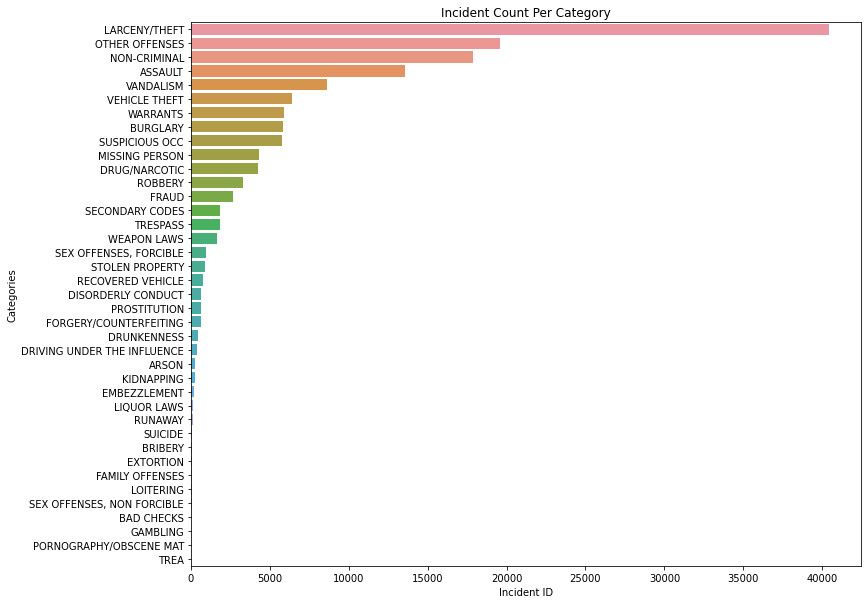

In [9]:
#Finding the category with maximun incident recorded
grpCategory=data.groupby("category",as_index=False).count()[['category','incident_id']].sort_values("incident_id", ascending=False)
plt.figure(figsize=(12,10))
sns.barplot(grpCategory['incident_id'],grpCategory['category']).set(xlabel='Incident ID',ylabel='Categories',title='Incident Count Per Category')
plt.show()

In [10]:
#Top 5 criminalize District
gp_top5dist = data.groupby('department_district',as_index=False)['category'].count()[['department_district','category']].sort_values('category', ascending=False)[:5]
gp_top5dist.columns = ['Department District','Category Count']
gp_top5dist

Department District  Category Count
7            SOUTHERN           28445
4            NORTHERN           20100
3             MISSION           19503
1             CENTRAL           17666
0             BAYVIEW           14303

In [11]:
#Total criminal incidents per district
gp_district = data.groupby('department_district',as_index=False)['category'].count()[['department_district','category']]
fig = px.pie(gp_district, values='category', names='department_district')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_layout(title='Proportion of Incidents by District', title_x=0.5)
fig.show()

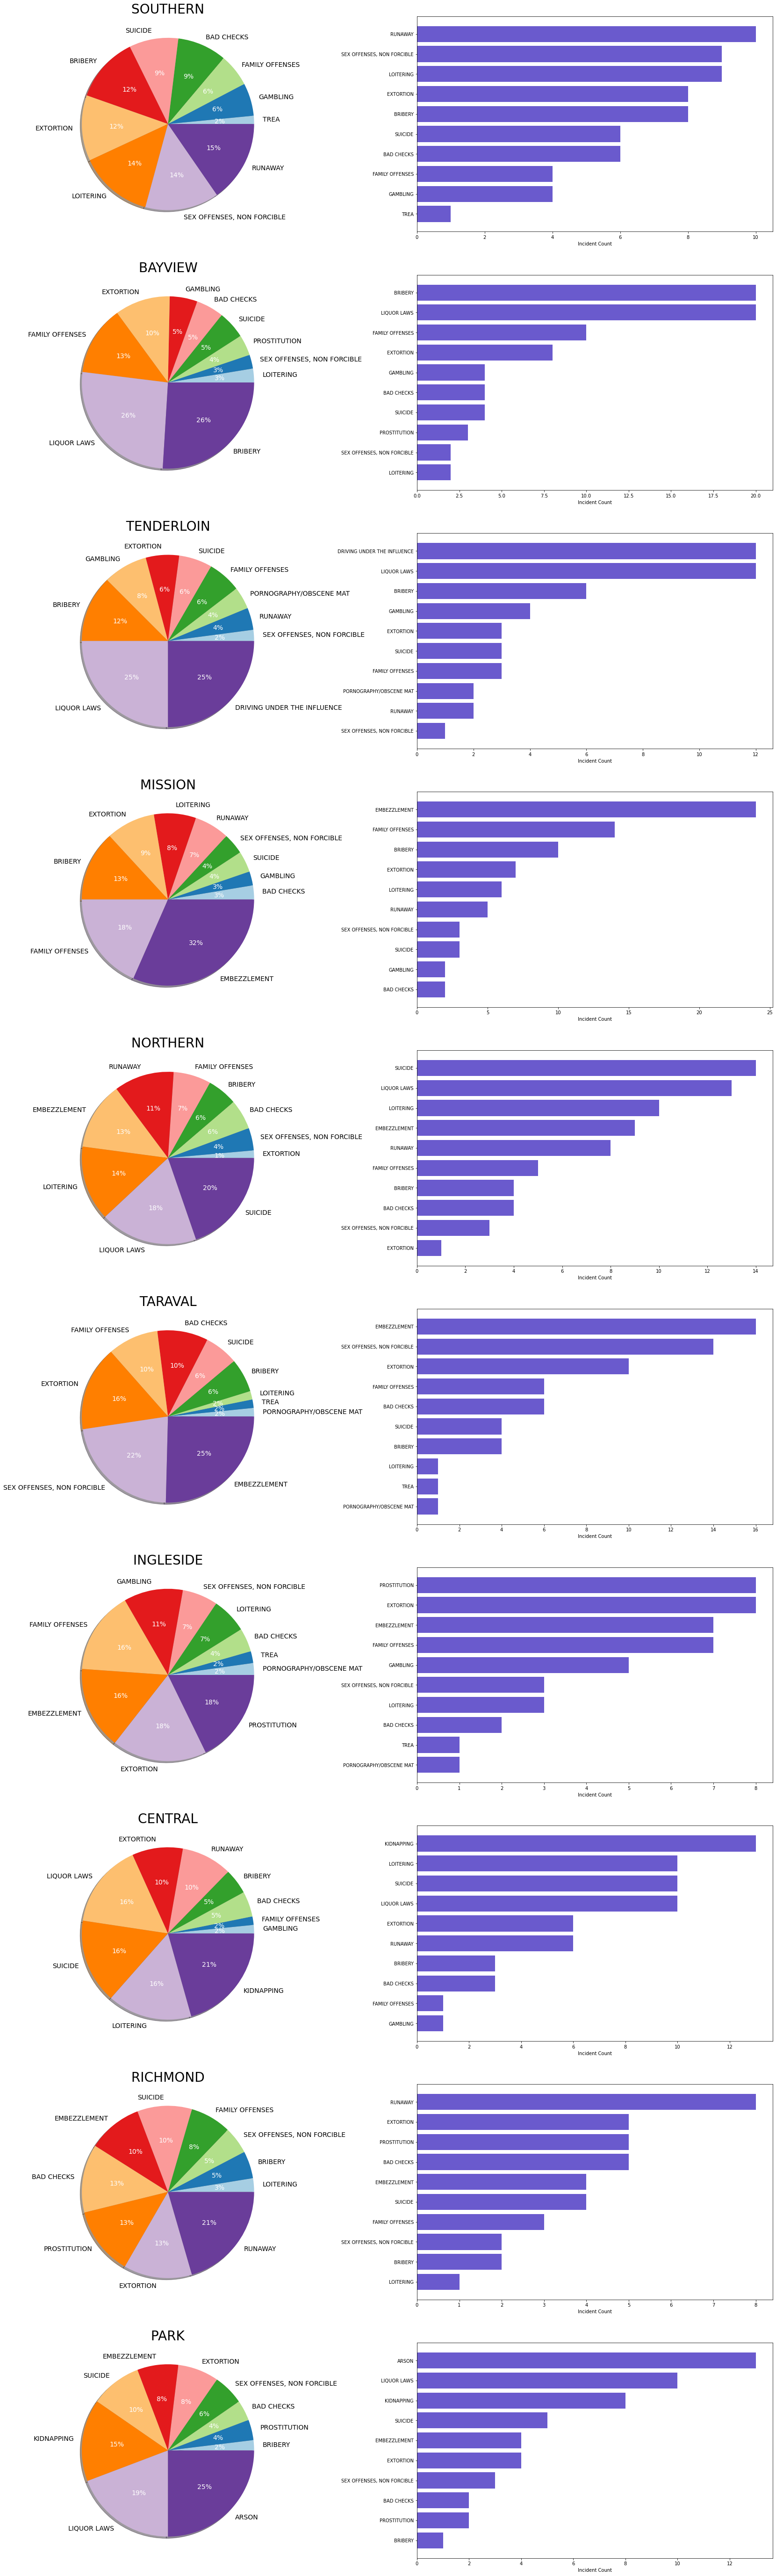

In [12]:
#Finding the proportion of category in a department district
palette_color = sns.color_palette('Paired')
gp_dept_cat=data.groupby(['department_district','category'],as_index=False).count()[['department_district','category','incident_id']]

def pieplotFunc(gpdata,plt,department_district,no_of_Category):
    result=gpdata[gpdata['department_district']==department_district].sort_values(by='incident_id')[:no_of_Category]
    _,_,autotexts = plt.pie(result['incident_id'],labels=result['category'],colors=palette_color,shadow=True,textprops={'fontsize': 14}, autopct='%.0f%%')
    for autotext in autotexts:
        autotext.set_color('white')

def barplotFunc(grpDeptCat,plt,department_district,no_of_Category):
    result=grpDeptCat[grpDeptCat['department_district']==department_district].sort_values(by='incident_id')[:no_of_Category]
    plt.barh(result['category'], result['incident_id'], color='slateblue')
    plt.set(xlabel='Incident Count')
#     plt.pie(result['incident_id'],labels=result['category'], autopct='%.0f%%')

fig, axi = plt.subplots(10,2)
fig.set_figheight(100)
fig.set_figwidth(30)

districtName=data['department_district'].unique()
index=0
top_number=10
for row in range(10):
    for col in range(0,2,2):
        pieplotFunc(gp_dept_cat,axi[row,col],districtName[index],top_number)
        barplotFunc(gp_dept_cat,axi[row,col+1],districtName[index],top_number)
        axi[row,col].set_title(' %s '% districtName[index],size=28)
        index +=1

In [13]:
#Checking the unique categories of resolution
data['resolution'].unique()

array(['ARREST, BOOKED', 'NONE', 'JUVENILE BOOKED', 'ARREST, CITED',
       'UNFOUNDED', 'JUVENILE DIVERTED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'EXCEPTIONAL CLEARANCE',
       'LOCATED', 'PSYCHOPATHIC CASE', 'COMPLAINANT REFUSES TO PROSECUTE',
       'NOT PROSECUTED', 'PROSECUTED BY OUTSIDE AGENCY', 'JUVENILE CITED'],
      dtype=object)

In [14]:
#Total counts of resolution category
data['resolution'].value_counts()

NONE                                      107779
ARREST, BOOKED                             39416
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                22
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
JUVENILE DIVERTED                              2
COMPLAINANT REFUSES TO PROSECUTE               2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: resolution, dtype: int64

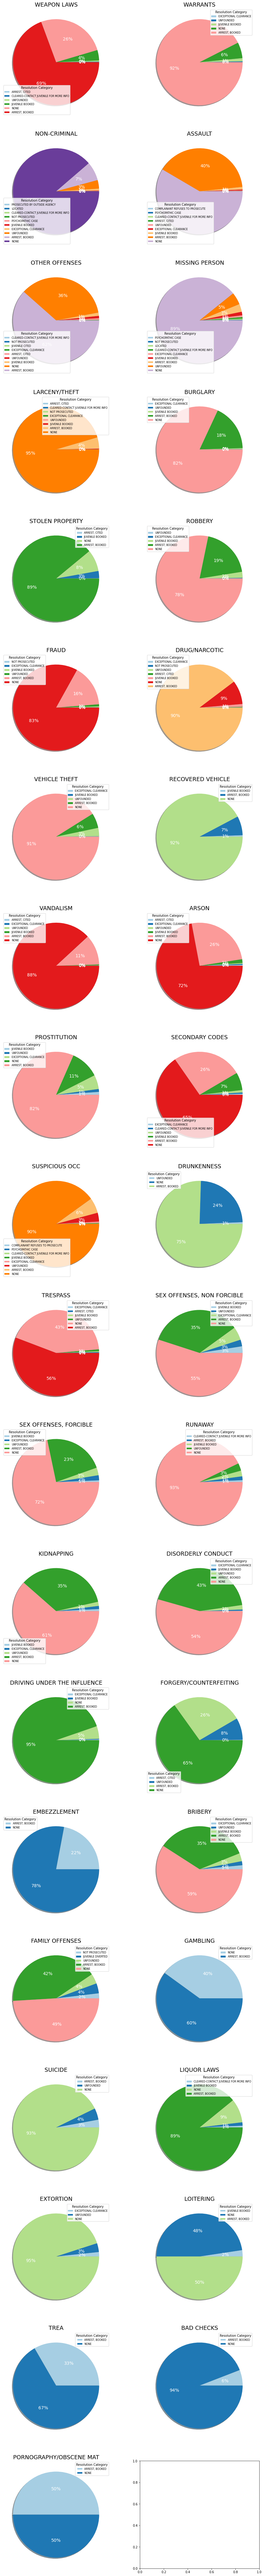

In [15]:
#PLotting the relation between Incident category and resolution types
palette_color = sns.color_palette('Paired')
grpCatRes=data.groupby(['category','resolution'],as_index=False).count()
grpCatRes=grpCatRes[['category','resolution','incident_id']]
def drawPlotCatRes(grpDeptCat,plt,cat):
    result=grpDeptCat[grpDeptCat['category']==cat].sort_values(by='incident_id')
#     plt.pie(result['incident_id'], autopct='%.0f%%',pctdistance=0.9)
    _,_,autotexts = plt.pie(result['incident_id'],colors=palette_color,shadow=True,textprops={'fontsize': 14}, autopct='%.0f%%')
    for autotext in autotexts:
        autotext.set_color('white')
    plt.legend(labels=result['resolution'],title='Resolution Category',loc='best',fontsize = 8)
    plt.set(title='Category')
fig, axs = plt.subplots(20,2)
fig.set_figheight(150)
fig.set_figwidth(15)
categoryName=data['category'].unique()
index=0
top_number=3
for row in range(20):
    for col in range(2):
        if (index>= len(categoryName)):
            continue
        drawPlotCatRes(grpCatRes,axs[row,col],categoryName[index])
        axs[row,col].set_title(' %s '% categoryName[index],size=18)
        index +=1

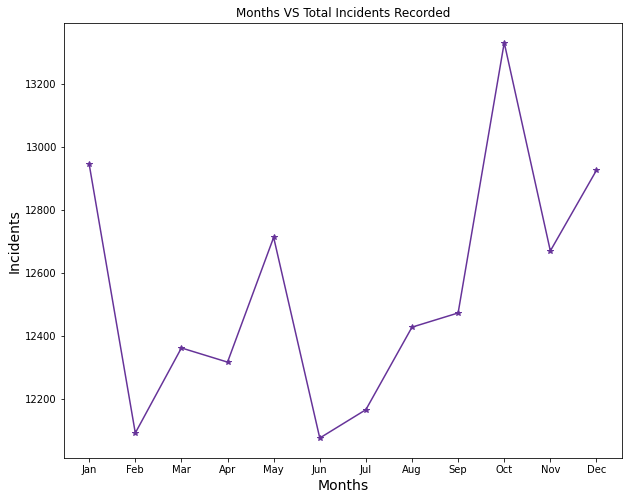

In [16]:
#Finding the relation between months and incident recorded
data['month']=data['crime_date'].dt.month
monthList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

gp_month = data.groupby('month',as_index=False).count()[['month','incident_id']]
plt.figure(figsize=(10,8))
plt.plot(gp_month['month'], gp_month['incident_id'], '-*', color='#663399')
plt.xticks([i for i in range(1,13)],monthList)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Incidents', fontsize=14)
plt.title("Months VS Total Incidents Recorded")
plt.show()

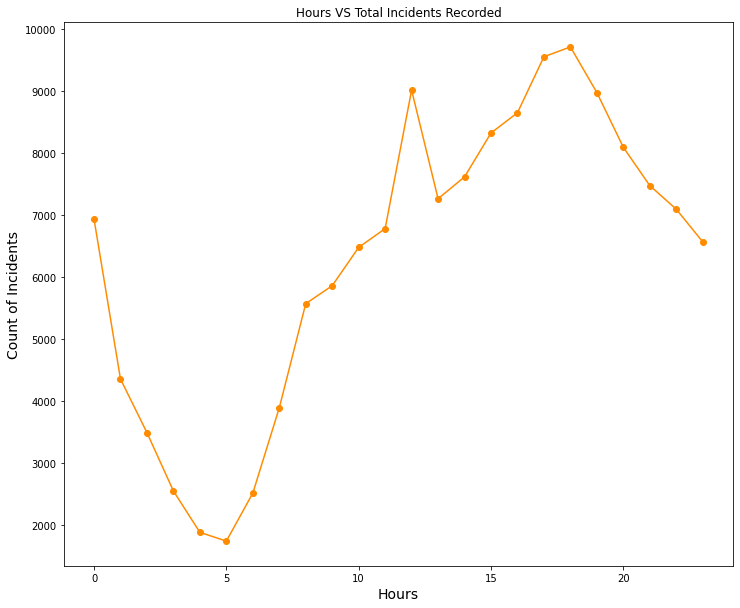

In [17]:
#Finding relation between hours and incidents recorded
data['hours']=data['crime_date'].dt.hour
gp_hours=data.groupby('hours',as_index=False).count()[['hours','incident_id']]

plt.figure(figsize=(12,10))
plt.plot(gp_hours['hours'], gp_hours['incident_id'], "-o", color='#FF8C00')
plt.xlabel('Hours', fontsize=14)
plt.ylabel('Count of Incidents', fontsize=14)
plt.title("Hours VS Total Incidents Recorded")
plt.show()

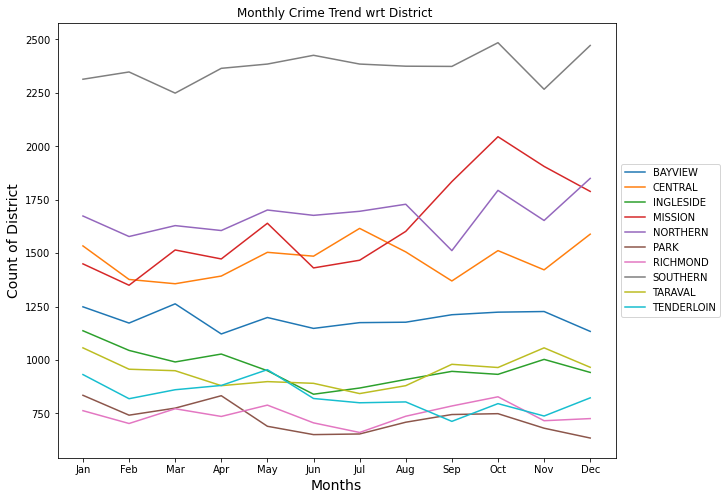

In [18]:
#Plotting relation between monthly incidents and department districts
gp_month_dept=data.groupby(['month','department_district'], as_index=False).count()[['month','incident_id','department_district']]
udist = gp_month_dept['department_district'].unique().tolist()
plt.figure(figsize=(10,8))

for dist in udist:
    select=gp_month_dept.loc[gp_month_dept['department_district']==dist]
    plt.plot(select['month'], select['incident_id'],label=dist)
    monthList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks([i for i in range(1,13)], monthList)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Count of District', fontsize=14)
plt.title("Monthly Crime Trend wrt District ")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [19]:
#Creating separate column for latitude and longitude
data['location']=data['location'].str.replace(r"\(|\)","")
data['latitude']=data["location"].str.split(",").apply(lambda x:x[0]).astype('float32')
data["longitude"]=data["location"].str.split(",").apply(lambda x:x[1]).astype('float32')

In [20]:
#Creating new data
location=data[["longitude","latitude"]]
location['category']=data['category']

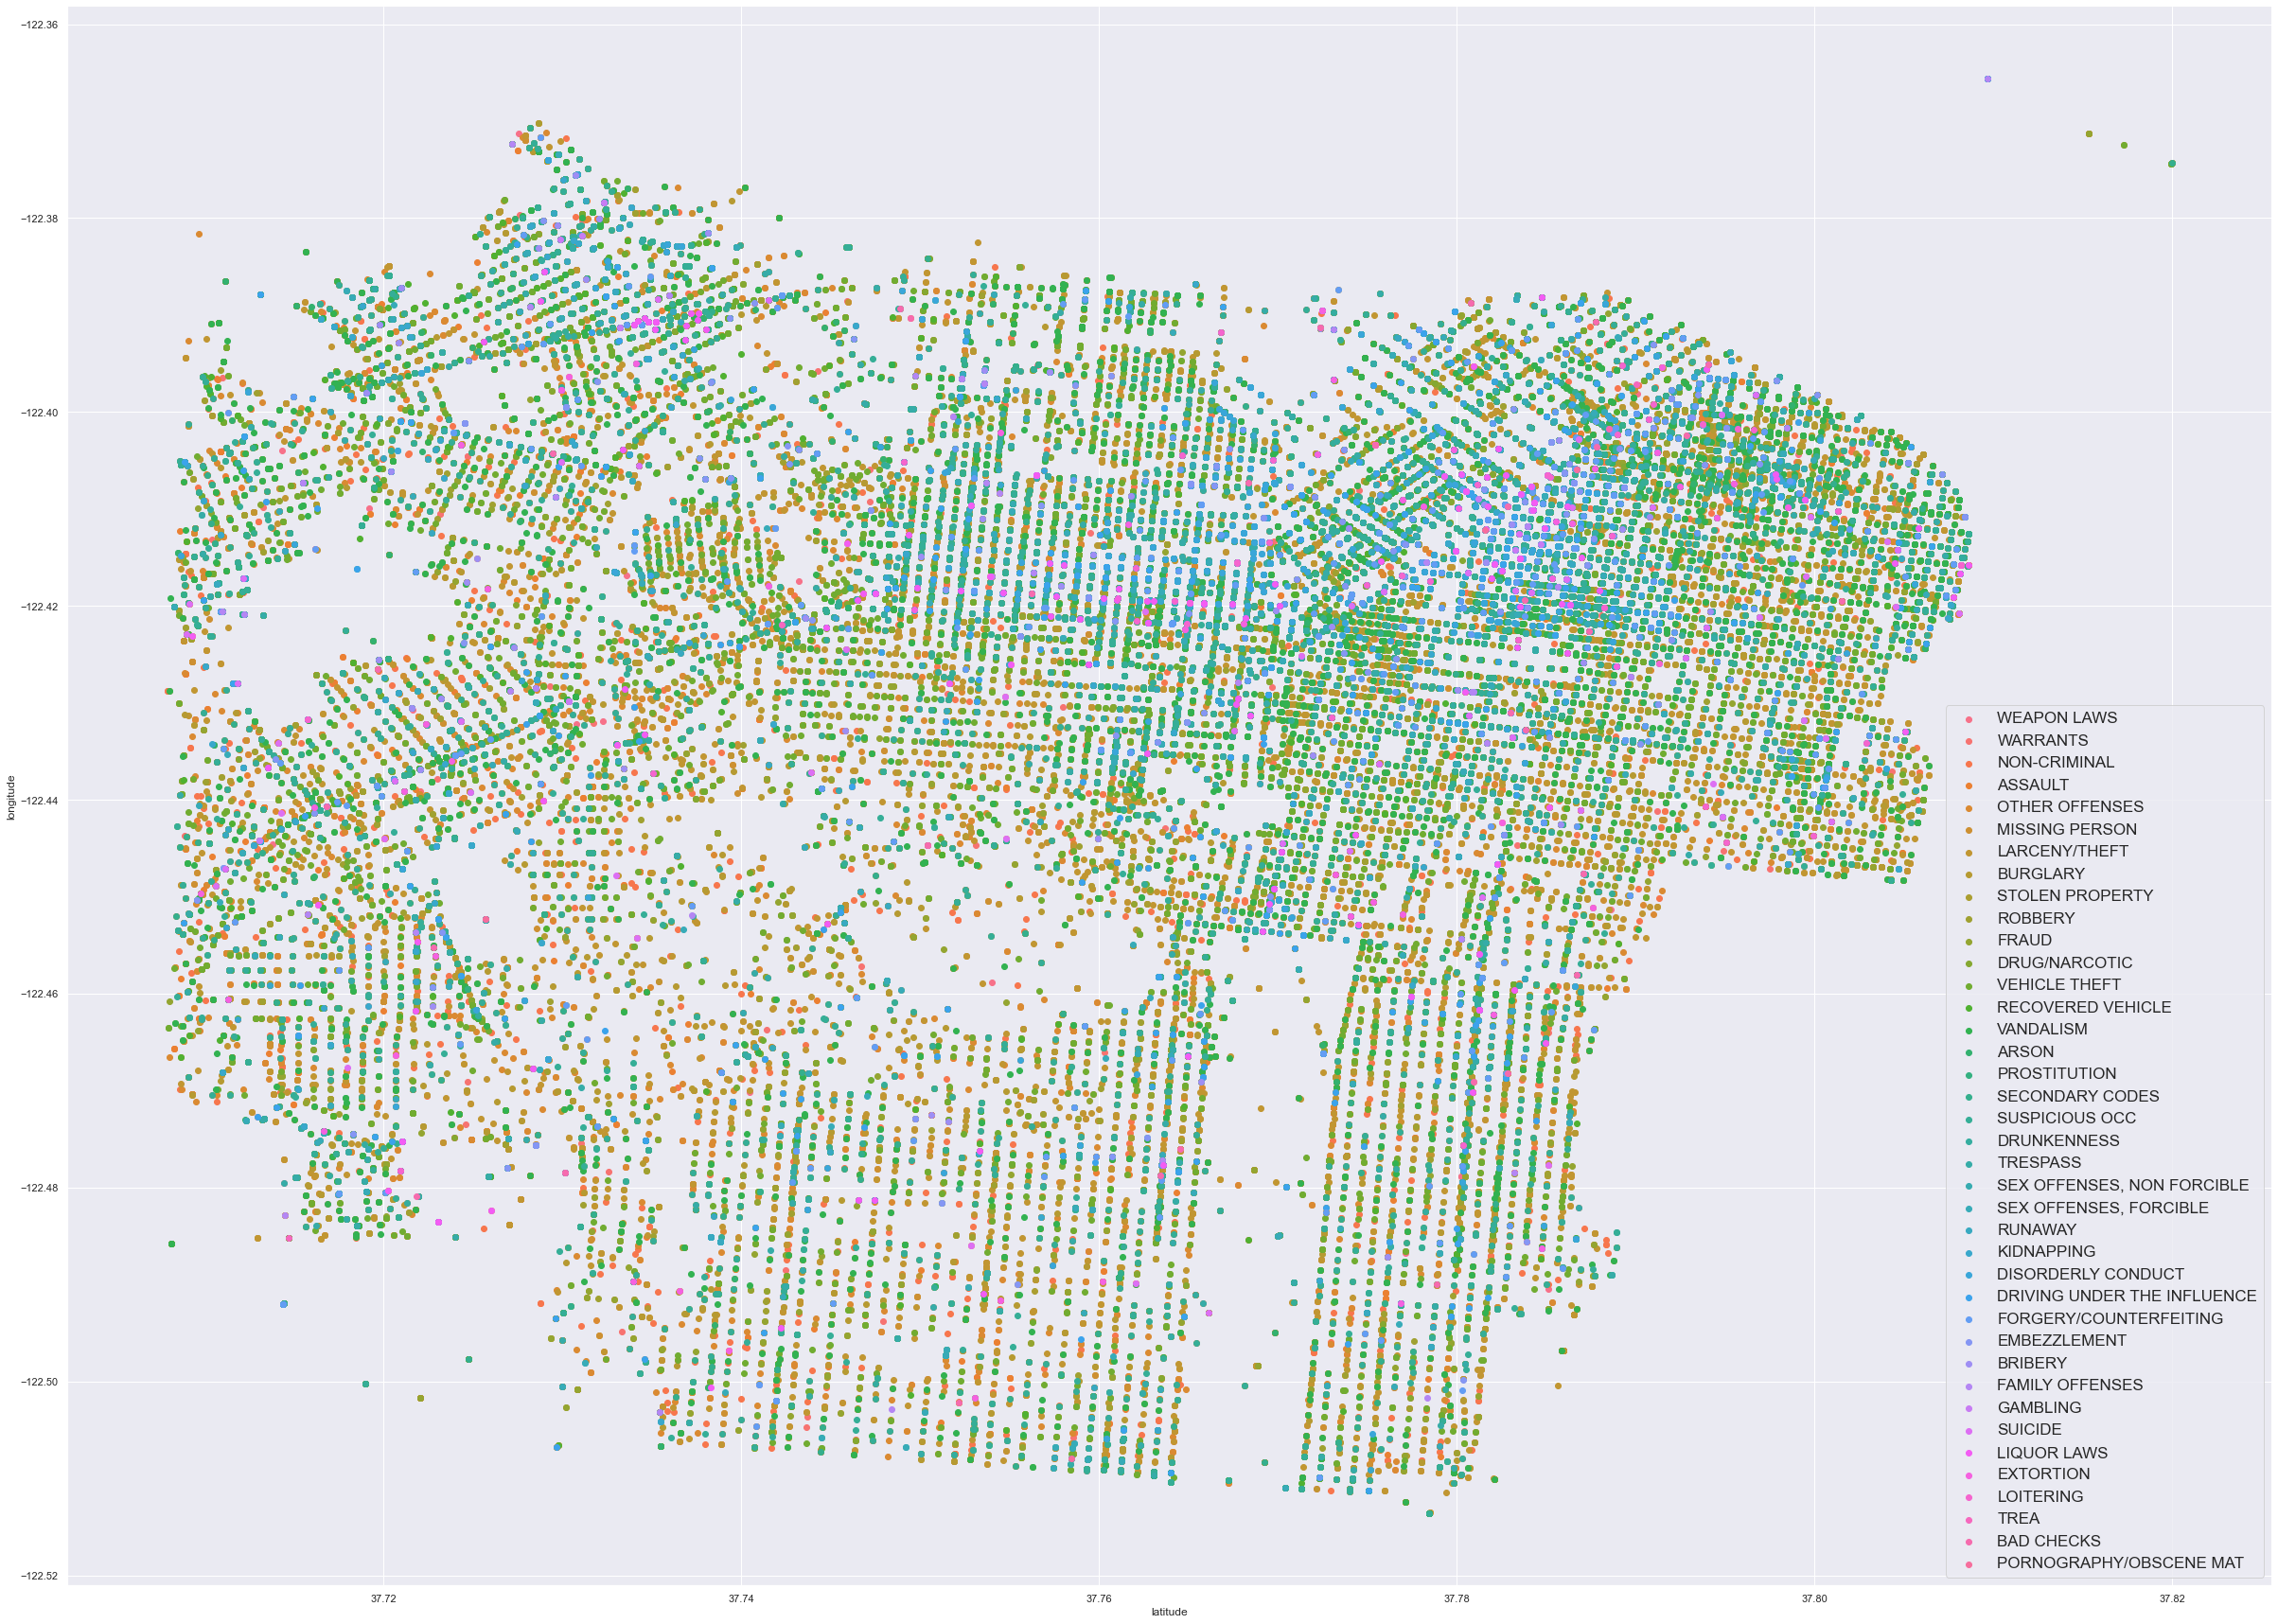

In [21]:
#plotting location where crime occur with help of latitude and longitude
sns.set(rc={"figure.figsize":(50, 14)})
fg = sns.FacetGrid(data=location, hue='category', size=24, aspect=1.4)
fg.map(plt.scatter, 'latitude', 'longitude')
plt.legend(fontsize=17)
plt.show()

<Figure size 1440x864 with 0 Axes>

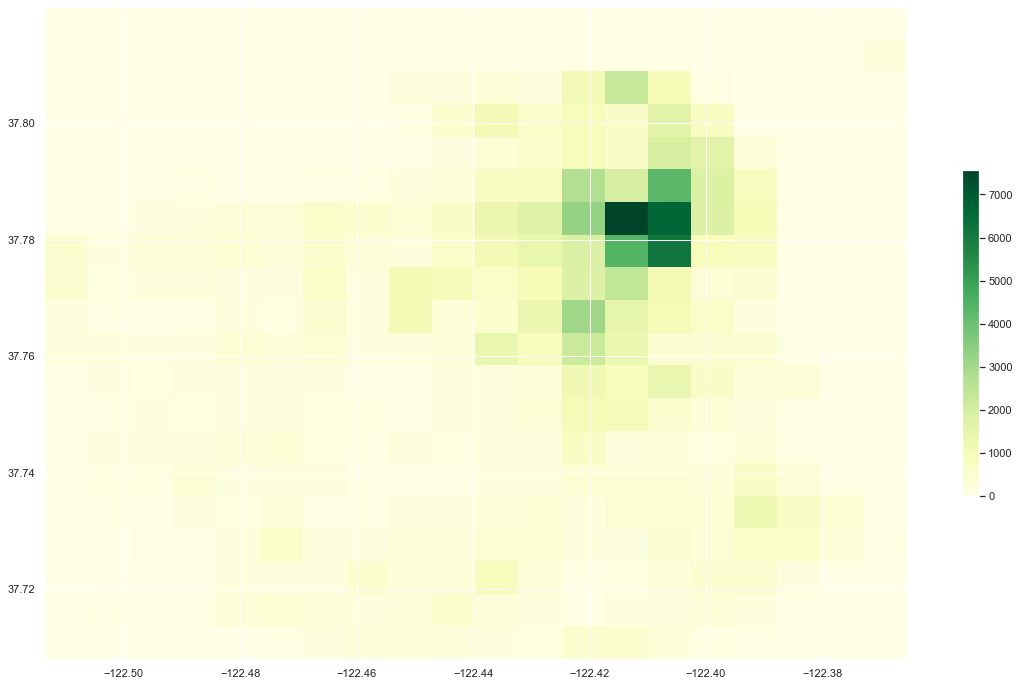

In [22]:
#Heat map to show the points of where maximum incident happens
plt.figure(figsize=(20,12))

heatmap, xedges, yedges = np.histogram2d(location["longitude"], location["latitude"], bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig, ax = plt.subplots( figsize=(20,12))
im = ax.imshow(heatmap.T, extent=extent,cmap="YlGn",origin="lower")
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.5 )
plt.show()
